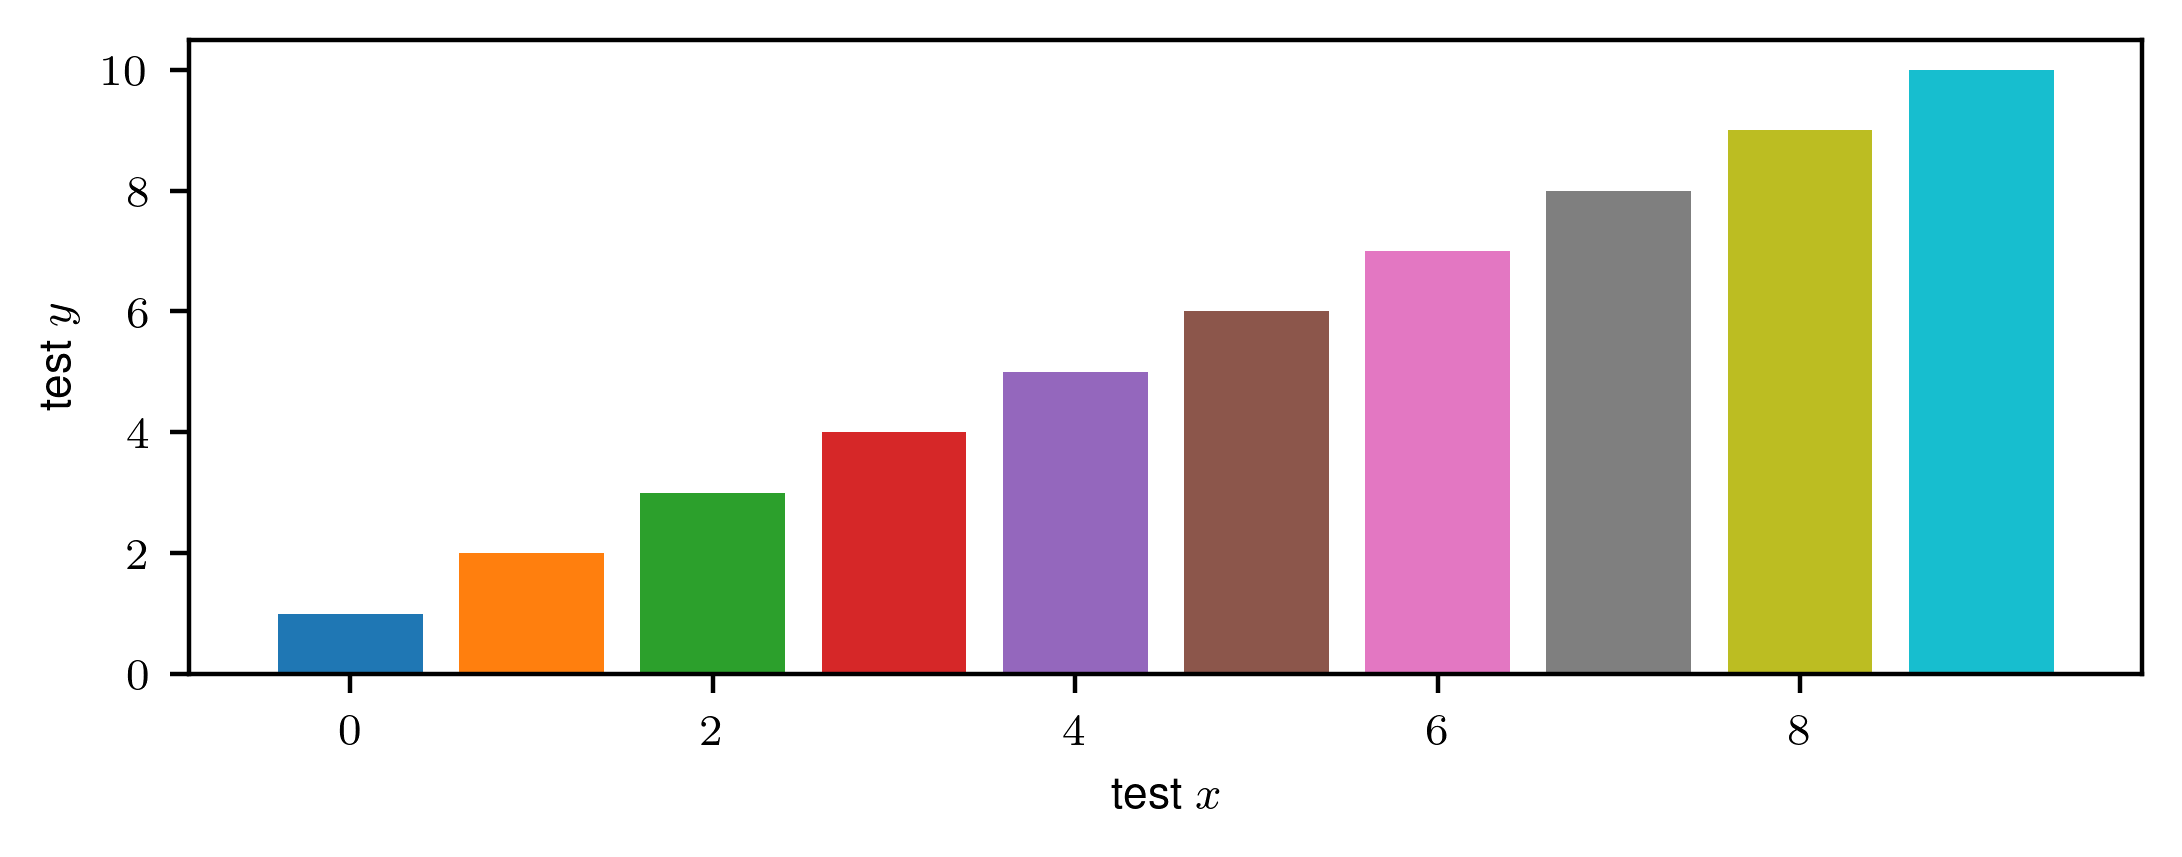

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines

text_width = 6.30107 # in  --> Confirmed with template explanation

fs = 6  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 9  # figure titles

matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title


matplotlib.rc('font', **{'family':'sans-serif', 'sans-serif': ['Helvetica']})
matplotlib.rc('text', usetex=True)

plt.figure(dpi=400, figsize=(text_width, text_width/3))
for i in range(10):
       plt.bar(i, i + 1, color=f'C{i}', zorder=2)
       # ^ This zorder nonsense makes the grid  lines go behid the bars. I don't know why this is needed for barplots, but shouldn't usually be needed.
# plt.title('\\textbf{Test}, $\\mathcal{C}, \\mathbb{R}$')
plt.xlabel('test $x$')
plt.ylabel('test $y$')
plt.show()

plt.style.use(['paper.mplstyle'])

In [2]:
#compute prep amount fot the different networks
rdn_dir = f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_rdn/seed_0_mixed"
skew_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_skew/seed_0_mixed"
disc_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_disc/seed_1_mixed"
soc_dir = f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed"
surrogate_dir = f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_sim_soc/seed_0_mixed"
surrogate_dir_2 = f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_nn_soc/seed_00_mixed_linear"

def rates_rdn(i=1,t=300):
    return np.loadtxt(f"{rdn_dir}/rates_{i}_{t}")

def rates_skew(i=1,t=300):
    return np.loadtxt(f"{skew_dir}/rates_{i}_{t}")


def rates_soc(i=1,t=300):
    return np.loadtxt(f"{soc_dir}/rates_{i}_{t}")

def rates_surrogate(i=0, t=300):
    return np.loadtxt(f"{surrogate_dir}/rates_{i}_{t}")


def rates_disc(i=1,t=300):
    return np.loadtxt(f"{disc_dir}/rates_{i}_{t}")


def us_rdn(i=0,t=300):
    return np.loadtxt(f"{rdn_dir}/us_{i}_{t}")

def us_skew(i=0,t=300):
    return np.loadtxt(f"{skew_dir}/us_{i}_{t}")

def us_soc(i=0,t=300):
    return np.loadtxt(f"{soc_dir}/us_{i}_{t}")


def us_surrogate(i=0, t=300):
    return np.loadtxt(f"{surrogate_dir}/us_{i}_{t}")

def us_disc(i=0,t=300):
    return np.loadtxt(f"{disc_dir}/us_{i}_{t}")

def thetas_rdn(i=1,t=300):
    return np.loadtxt(f"{rdn_dir}/thetas_{i}_{t}")

def thetas_skew(i=1,t=300):
    return np.loadtxt(f"{skew_dir}/thetas_{i}_{t}")

def thetas_surrogate(i=0,t=300):
    return np.loadtxt(f"{surrogate_dir}/thetas_{i}_{t}")

def thetas_soc(i=0,t=300):
    return np.loadtxt(f"{soc_dir}/thetas_{i}_{t}")

def thetas_disc(i=0,t=300):
    return np.loadtxt(f"{disc_dir}/thetas_{i}_{t}")

targets = np.loadtxt(f"{soc_dir}/targets")
soc_eigs = np.loadtxt(f"{soc_dir}/eigs")
skew_eigs = np.loadtxt(f"{skew_dir}/eigs")
rdn_eigs = np.loadtxt(f"{rdn_dir}/eigs")
surrogate_eigs = np.loadtxt(f"{surrogate_dir}/eigs")



In [3]:
n_targets = 7
times = [0, 50, 70, 150, 200, 300]
#[0, 50, 70, 100, 200, 300, 500]
def prep_idx(dir, times):
    def get_prep_idx(us, t):
        if t == 0:
            return 0
        else : 
            cutoff = int(t/2 ) - 1
            u_prep, u_mov = us[:cutoff], us[cutoff:]
            pi = np.sqrt(np.sum(u_prep**2)/np.sum(u_mov**2))
            return pi
    def us(t,i):
        return np.loadtxt(f"{dir}/us_{i}_{t}")
    def get_all_idces(i):
            ai = np.asarray([get_prep_idx(us(t, i),t) for t in times])
            return ai[:,None]
    movs = range(n_targets)
    idces = [get_all_idces(i) for i in movs]
    print(idces)
    idces= np.concatenate(idces, axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(8)
    return m, v

def cost_u(dir, times):
    def cost_u(t, i):
       try :
           return np.loadtxt(f'{dir}/u_cost_{i}_{t}')[-1]
       except : 
           assert True
    def get_all_idces(i):
        ai = np.asarray([cost_u(t,i) for t in times])
        return ai
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(8)
    return m, v

def cost_tgt(dir, times):
    def cost_tgt(t, i):
       try : 
           return np.loadtxt(f'{dir}/task_cost_{i}_{t}')[-1]
       except : 
           assert True
    def get_all_idces(i):
        ai = np.asarray([cost_tgt(t,i) for t in times])
        return ai
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(n_targets)
    return m, v

def cost_torques(dir, times):
    def cost_torques(t, i):
           np.loadtxt(f'{dir}/task_cost_{i}_{t}')[0]
    def get_all_idces(i):
        ai = np.asarray([cost_torques(t,i) for t in times])
        return ai
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(n_targets)
    return m, v

def mv_loss(dir, times):
    def cost_torques(t, i):
       try : 
           return np.loadtxt(f'{dir}/loss_{i}_{t}').sum()
       except : 
           return True
    def get_all_idces(i):
        ai = np.asarray([cost_torques(t,i) for t in times])
        return ai
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(n_targets)
    return m, v

In [4]:
m_prep_rdn, _ = prep_idx(rdn_dir, times)
m_prep_skew, _ = prep_idx(skew_dir, times)
m_prep_soc, _ = prep_idx(soc_dir, times)
m_prep_disc,_  = prep_idx(disc_dir, times)
m_prep_surrogate,_  = prep_idx(surrogate_dir, times)
#m_prep_surrogate_nn,_  = prep_idx(surrogate_dir_2, times)

m_loss_rdn, _ = mv_loss(rdn_dir, times)
m_loss_skew, _ = mv_loss(skew_dir ,times)
m_loss_soc, _ = mv_loss(soc_dir ,times)
m_loss_disc,_  = mv_loss(disc_dir, times)
m_loss_surrogate,_  = mv_loss(surrogate_dir, times)
#m_loss_surrogate_nn,_  = mv_loss(surrogate_dir_2, times)
print(m_prep_rdn, m_loss_rdn)

[array([[0.        ],
       [0.15862181],
       [0.1709241 ],
       [0.19026308],
       [0.19421257],
       [0.19624673]]), array([[0.        ],
       [0.12573528],
       [0.1364461 ],
       [0.15264259],
       [0.15566467],
       [0.15805613]]), array([[0.        ],
       [0.1290709 ],
       [0.13933639],
       [0.15379764],
       [0.15619705],
       [0.15917661]]), array([[0.        ],
       [0.16567001],
       [0.17724841],
       [0.19253024],
       [0.19557177],
       [0.19558512]]), array([[0.        ],
       [0.17973743],
       [0.19187769],
       [0.20691333],
       [0.20799808],
       [0.20761176]]), array([[0.        ],
       [0.16290885],
       [0.1740944 ],
       [0.19014591],
       [0.1932077 ],
       [0.1937894 ]]), array([[0.        ],
       [0.14374891],
       [0.15440883],
       [0.17001273],
       [0.17206294],
       [0.17324363]])]
[array([[0.        ],
       [0.53235196],
       [0.57768872],
       [0.64962082],
       [0.66387644

In [5]:
scan_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg"
# skew_scan_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.01_0.0000003_9.0/ramping_skew_rads"
# rdn_scan_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.01_0.0000003_9.0/ramping_rdn_rads"
spectral_abscissas = [0.0, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
skew_radii = [0.1, 0.5, 0.8, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.7, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 11.0, 12.0, 13.0, 14.0, 15.]
soc_radii = [0.1, 0.8, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 0.3, 0.5, 0.7, 0.8, 1.0, 1.1, 1.3, 1.4, 1.6, 1.7, 1.8, 1.9, 2.1,0.2, 0.4, 0.6, 0.9, 1.3, 2.2, 2.7, 3.2, 3.7]
#1.0, 1.5, 2.0, 2.5, 3.0,  3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 10.0, 3.1, 3.4, 3.6, 3.8, 4.1, 4.2,4.3, 4.6, 4.9, 5.2, 5.3, 5.4, 5.7, 5.9]
rdn_radii = [0.0,0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
n_targets = 7
def get_pi_rads(dir, radii, typ):
    norms = []
    sas = []
    srs = []
    pis = []
    for rad in radii :
        for sa in spectral_abscissas :
            pi = 0
            k = 0
            for n in range(n_targets):
                try : 
                    if typ == "rdn":
                        res = np.loadtxt(f"{dir}/rdn_{n}_{rad}_{rad}")
                    elif typ == "skew": 
                        res = np.loadtxt(f"{dir}/skew_{n}_{rad}_{sa}")
                    elif typ == "soc": 
                        res = np.loadtxt(f"{dir}/soc_{n}_{rad}_{sa}")
                    pi += res[2]
                    k += 1
                    print(k)
                except : 
                    assert True
            if k > 0 :
                norms.append(res[1])
                sas.append(res[-1])
                srs.append(res[-2])
                pis.append(pi/k)
    return np.asarray(norms), np.asarray(pis), np.asarray(sas), np.asarray(srs)

def get_pi_sas(dir, typ):
    norms = []
    sas = []
    srs = []
    pis = []
    rad = 1.5 if typ=="soc" else 4.0
    for sa in spectral_abscissas :
        pi = 0
        k = 0
        for n in range(n_targets):
            try : 
                if typ == "skew": 
                    res = np.loadtxt(f"{dir}/skew_{n}_{rad}_{sa}")
                elif typ == "soc": 
                    res = np.loadtxt(f"{dir}/soc_{n}_{rad}_{sa}")
                pi += res[2]
                k += 1
            except : 
                assert True
        if k > 0 :
            norms.append(res[1])
            sas.append(res[-1])
            srs.append(res[-2])
            pis.append(pi/k)
    return np.asarray(norms), np.asarray(pis), np.asarray(sas), np.asarray(srs)


get_pi_rads(scan_dir, soc_radii, "soc")


(array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64))

In [6]:
soc_prep_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/comps/monkeys_0.05_0.00000003_5.0/ramping_soc/seed_5_prep"
soc_mov_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/comps/monkeys_0.05_0.00000003_5.0/ramping_soc/seed_5_mov"
soc_mixed_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/comps/monkeys_0.05_0.00000003_5.0/ramping_soc/seed_5_mixed"
skew_prep_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/comps/monkeys_0.05_0.00000003_5.0/ramping_skew/seed_5_prep"
skew_mov_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/comps/monkeys_0.05_0.00000003_5.0/ramping_skew/seed_5_mov"
skew_mixed_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/comps/monkeys_0.05_0.00000003_5.0/ramping_skew/seed_5_mixed"
rdn_prep_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/comps/monkeys_0.05_0.00000003_5.0/ramping_skew/seed_5_prep"
rdn_mov_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/comps/monkeys_0.05_0.00000003_5.0/ramping_rdn/seed_5_mov"
rdn_mixed_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/comps/monkeys_0.05_0.00000003_5.0/ramping_rdn/seed_5_mixed"
n_targets = 6
def get_av_loss(dir, t):
    k = 0
    loss = 0
    for i in range(n_targets):
        try : 
            task_cost = np.sum(np.loadtxt(f"{dir}/task_cost_{i}_{t}"))
            input_cost = np.loadtxt(f"{dir}/u_cost_{i}_{t}")[-1]
            loss += task_cost + input_cost
            k+=1
        except : 
            assert True
    if k > 0:
        return loss/k
    else :
        return -10

def get_av_loss_prep(dir, t):
    k = 0
    loss = 0
    for i in range(n_targets):
        try : 
            task_cost = np.sum(np.loadtxt(f"{dir}/task_cost_{i}_{t}"))
            input_cost = np.loadtxt(f"{dir}/u_cost_{i}_{t}")[0]
            loss += task_cost + input_cost
            k+=1
        except : 
            assert True
    if k > 0:
        return loss/k
    else :
        return -10

def get_av_loss_mov(dir, t):
    k = 0
    loss = 0
    for i in range(n_targets):
        try : 
            task_cost = np.sum(np.loadtxt(f"{dir}/task_cost_{i}_{t}"))
            input_cost = np.loadtxt(f"{dir}/u_cost_{i}_{t}")[1]
            loss +=task_cost + input_cost
            k+=1
        except : 
            assert True
    if k > 0:
        return loss/k
    else :
        return -10

soc_loss, soc_prep_loss, soc_mov_loss = get_av_loss(soc_mixed_dir, 300), get_av_loss_prep(soc_prep_dir, 300), get_av_loss_mov(soc_mov_dir, 300)
skew_loss, skew_prep_loss, skew_mov_loss = get_av_loss(skew_mixed_dir, 300), get_av_loss_prep(skew_prep_dir, 300), get_av_loss_mov(skew_mov_dir, 300)
rdn_loss, rdn_prep_loss, rdn_mov_loss = get_av_loss(rdn_mixed_dir, 500), get_av_loss_prep(rdn_prep_dir, 500), get_av_loss_mov(rdn_mov_dir, 500)
print(rdn_loss, rdn_prep_loss, rdn_mov_loss)
print(skew_loss, skew_prep_loss, skew_mov_loss)
print(soc_loss, soc_prep_loss, soc_mov_loss)

-10 -10 -10
-10 -10 -10
-10 -10 -10


In [7]:
def get_all_pi_rads(dir, radii, typ):
    norms = []
    pis = []
    sas = []
    srs =[]
    for rad in radii :
        for sa in spectral_abscissas :
            for n in range(n_targets):
                try : 
                    res = np.loadtxt(f"{dir}/{typ}_{n}_{rad}_{sa}")
                    pis.append(res[2])
                    norms.append(res[1])
                except : 
                    assert True
                for s in range(2):
                    try : 
                        res = np.loadtxt(f"{dir}/{typ}_{n}_{rad}_{sa}_{s}")
                        pis.append(res[2])
                        norms.append(res[1])
                        sas.append(sa)
                        srs.append(res[-2])
                    except : 
                        assert True
    return np.asarray(norms), np.asarray(pis), np.asarray(sas), np.asarray(srs)



(1050,)
(728,) (728,)


/home/mmcs3/.virtualenvs/why-prep/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mmcs3/.virtualenvs/why-prep/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[ 0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       1.42051  1.41575  1.41482  1.40243
  1.40568  1.42111  1.41598  1.41291  1.41966  1.41563  1.41522  1.41143
  2.82574  2.84781  2.8311   2.82846  2.84025  2.82284  2.81762  2.82097
  2.80779  2.83046  2.8259   2.82342  5.68973  5.6598   5.66688  5.64539
  5.62903  5.6752   5.67341  5.60614  5.6503   5.67437  5.67685  5.66938
  7.08006  7.06051  7.07568  7.09186  7.04984  7.0845   7.06422  7.08696
  7.07894  7.1147   7.07157  7.03551  7.07086  7.09851  8.51348  8.46277
  8.47529  8.50338  8.47852  8.49387  8.47902  8.49797  8.51605  8.47336
  8.52738  8.51969  8.48695  8.50301  8.51925  8.51857  8.48386  9.99489
  9.89832  9.92622  9.90353  9.89615  9.91501  9.8996   9.86183  9.88665
  9.87157  9.93132  9.95585  9.87182  9.8968   9.86281  9.83917  9.83527
  9.91809 11.2827  11.2183  11.2871  11.3507  11.3189  11.3059  11.3409
 11.242   11.3346  11.3548  11.334   11.3416  11.3529  11

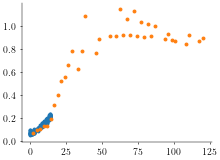

In [8]:
soc_norms, soc_pis, soc_sas, _ = get_all_pi_rads("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg", soc_radii, "soc")
ss_norms, ss_pis, ss_sas, _ = get_all_pi_rads("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg", soc_radii, "sim_soc")
print(ss_norms.shape)
n_min, n_max = np.min(soc_norms), np.max(soc_norms)
n_bins = 50
soc_locs = []
prep_idces = []
print(soc_norms.shape,soc_sas.shape)
for i in range(n_bins):
    loc_min = n_min + i/n_bins*(n_max - n_min)
    loc_max = n_min + (i+1)/n_bins*(n_max - n_min)
    soc_locs.append((loc_min + loc_max)/2)
    idces= np.argwhere((loc_min < soc_norms) & (soc_norms < loc_max))
    ppis = soc_pis[idces]
    prep_idces.append(np.mean(ppis))

#plt.scatter(locs, prep_idces)

skew_norms, skew_pis, skew_sas,_ = get_all_pi_rads("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg", skew_radii, "skew")
n_min, n_max = np.min(skew_norms), np.max(skew_norms)
n_bins = 50
skew_locs = []
prep_idces_skew = []
for i in range(n_bins):
    loc_min = n_min + i/n_bins*(n_max - n_min)
    loc_max = n_min + (i+1)/n_bins*(n_max - n_min)
    skew_locs.append((loc_min + loc_max)/2)
    idces= np.argwhere((loc_min < skew_norms) & (skew_norms < loc_max))
    ppis = skew_pis[idces]
    prep_idces_skew.append(np.mean(ppis))


rdn_norms, rdn_pis, _,_ = get_all_pi_rads("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg", rdn_radii, "rdn")
print(rdn_norms, rdn_pis)
plt.scatter(rdn_norms, rdn_pis)
n_min, n_max = np.min(rdn_norms), np.max(rdn_norms)
n_bins = 50
rdn_locs = []
prep_idces_rdn = []
for i in range(n_bins):
    loc_min = n_min + i/n_bins*(n_max - n_min)
    loc_max = n_min + (i+1)/n_bins*(n_max - n_min)
    rdn_locs.append((loc_min + loc_max)/2)
    idces= np.argwhere((loc_min < rdn_norms) & (rdn_norms < loc_max))
    ppis = rdn_pis[idces]
    prep_idces_rdn.append(np.mean(ppis))
plt.scatter(skew_locs, prep_idces_skew)

av_soc_sas = []
av_soc_prep_idces = []
n_min, n_max = np.min(soc_sas), 0.85
print(n_min,n_max)
n_bins = 20
for i in range(n_bins):
    loc_min = n_min + i/n_bins*(n_max - n_min)
    loc_max = n_min + (i+1)/n_bins*(n_max - n_min)
    idces= np.argwhere((loc_min < soc_sas) & (soc_sas <= loc_max))
    if np.shape(idces)[0] > 0:
        av_soc_sas.append((loc_min + loc_max)/2)
        ppis = soc_pis[idces]
        print(ppis.shape)
        av_soc_prep_idces.append(np.mean(ppis))


av_skew_sas = []
av_skew_prep_idces = []
n_min, n_max = np.min(skew_sas), 0.85
print(n_min,n_max)
n_bins = 20
for i in range(n_bins):
    loc_min = n_min + i/n_bins*(n_max - n_min)
    loc_max = n_min + (i+1)/n_bins*(n_max - n_min)
    idces= np.argwhere((loc_min < skew_sas) & (skew_sas <= loc_max))
    if np.shape(idces)[0] > 0:
        av_skew_sas.append((loc_min + loc_max)/2)
        ppis = skew_pis[idces]
        print(ppis.shape)
        av_skew_prep_idces.append(np.mean(ppis))

av_ss_sas = []
av_ss_prep_idces = []
n_min, n_max = np.min(skew_sas), 0.85
print(n_min,n_max)
n_bins = 20
for i in range(n_bins):
    loc_min = n_min + i/n_bins*(n_max - n_min)
    loc_max = n_min + (i+1)/n_bins*(n_max - n_min)
    idces= np.argwhere((loc_min < ss_sas) & (ss_sas <= loc_max))
    if np.shape(idces)[0] > 0:
        av_ss_sas.append((loc_min + loc_max)/2)
        ppis = ss_pis[idces]
        print(ppis.shape)
        av_ss_prep_idces.append(np.mean(ppis))


(728,) tree0
(728,) (728,) treeee


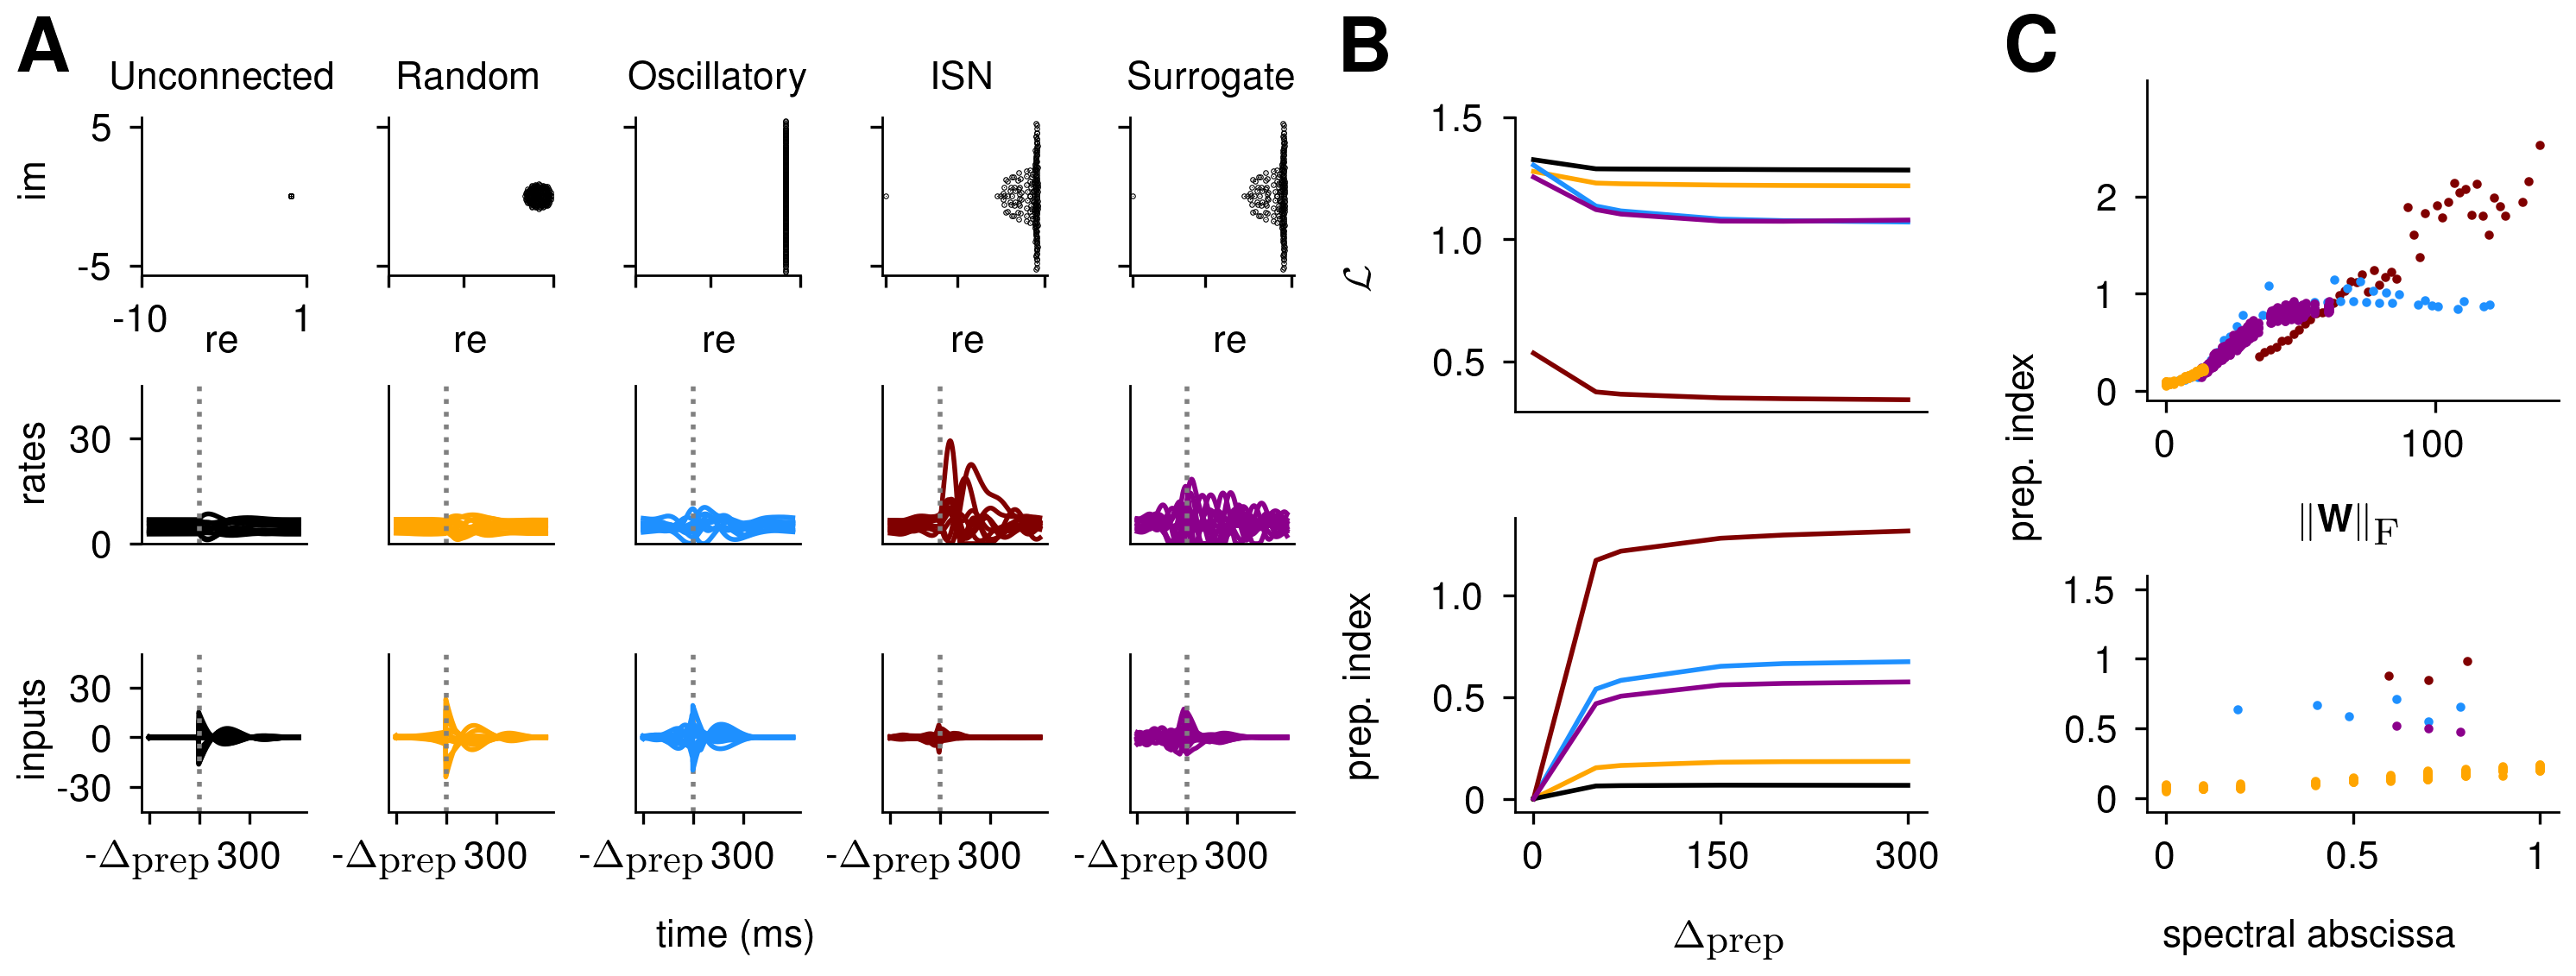

In [13]:
import matplotlib
import matplotlib.gridspec as gridspec
#times = [0, 50, 100, 300, 500]
times = [0, 50, 70, 150, 200, 300]
c_nets = {"rdn":"orange", "skew":"dodgerblue", "soc":"maroon", "lr":"forestgreen", "disc":"black", "surrogate":"darkmagenta"}
v1 = 1
v2 = 3
#for now just for visualization
gs = gridspec.GridSpec(3, 9)
fig, axes = plt.subplots(nrows=3, ncols=8,  figsize=((8, 8/3)), dpi = 400)
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)

cs = ["darkcyan", "darkorange", 'rosybrown', 'indigo', 'deepskyblue', 'royalblue', 'slategray']
neurons = [0, 8, 11, 20, 44, 100, 101, 144, 198, 199]

ax_loss = plt.subplot(gs[:2,5:7])
ax_prep = plt.subplot(gs[2:,5:7])


##Plot the evolutions as function of spectral radius and norm, and for different prep amounts
ax_norm = plt.subplot(gs[:2,-2:])
ax_sa = plt.subplot(gs[2,-2:])
ax_sa.set_ylim(-0.1,1.6)
ax_sa.set_yticks([0,0.5,1,1.5], [0,0.5,1,1.5], fontsize = fs)
ax_sa.set_xticks([0,1], [0,1], fontsize = fs)
ax_norm.set_ylim(-0.1,3.2)
ax_norm.set_yticks([0,1,2], [0,1,2], fontsize = fs)
ax_norm.set_xticks([0,100,200], [0,100,200], fontsize = fs)
#ax_prior = plt.subplot(gs[0,:2])
#ax_prior.set_ylim(-1,20)
#ax_prior.set_yticks([1], [1])
pos_norm, pos_sa = ax_norm.get_position(), ax_sa.get_position()
#pos_prior = ax_prior.get_position()
ax_norm.set_position([pos_norm.x0 + 0.1, pos_norm.y0 + 0.04 + pos_norm.height/4, pos_norm.width, 0.75*pos_norm.height])
ax_sa.set_position([pos_norm.x0 + 0.1, pos_sa.y0, pos_sa.width, 1.5*pos_sa.height])
#ax_prior.set_position([pos_norm.x0 - 0.05, pos_prior.y0, pos_prior.width, 0.9*pos_prior.height - 0.03])
ax_norm.set_xlabel("$\\|\\textbf{W}\\|_\\textrm{F}$", size = fs)
# ax_sa.set_xlabel("spectral abscissa")
#ax_prior.set_xticks([], [])
##Norm plot
soc_norms, soc_pis, soc_sas, soc_srs = get_all_pi_rads(scan_dir, soc_radii, "soc")
print(soc_sas.shape, "tree0")
skew_norms, skew_pis, skew_sas, skew_srs = get_all_pi_rads(scan_dir, skew_radii, "skew")
_, skew_pis_sas, skew_sas, _ = get_all_pi_rads(scan_dir, skew_radii, "skew")
_, soc_pis_sas, soc_sas, _ = get_all_pi_rads(scan_dir, soc_radii, "soc")
rdn_norms, rdn_pis, rdn_sas, rdn_srs = get_all_pi_rads(scan_dir, rdn_radii, "rdn")
#print(rdn_norms, rdn_pis)

ax_norm.scatter(soc_locs, prep_idces, color = c_nets["soc"], s=0.8)
#ax_norm.scatter(soc_norms, soc_pis, color = c_nets["soc"], s=0.8)
ax_norm.scatter(skew_locs, prep_idces_skew, color = c_nets["skew"], s=0.8)
ax_norm.scatter(ss_norms, ss_pis, color = c_nets["surrogate"],  s=0.8)
ax_norm.scatter(rdn_norms, rdn_pis, color = c_nets["rdn"], s = 0.8)
###SA plot
print(soc_sas.shape, soc_pis.shape, "treeee")
ax_sa.scatter(av_soc_sas, av_soc_prep_idces, color = c_nets["soc"],  s=0.8)
ax_sa.scatter(av_skew_sas, av_skew_prep_idces, color = c_nets["skew"],  s=0.8)
ax_sa.scatter(av_ss_sas, av_ss_prep_idces, color = c_nets["surrogate"],  s=0.8)
ax_sa.scatter(rdn_sas, rdn_pis, color = c_nets["rdn"],  s=0.8)
ax_sa.set_xticks([0,0.5,1], [0,0.5, 1], fontsize = fs)
##prior comp
'''
ax_prior.set_xlim(0,6)
ax_prior.scatter(1, 1, color = c_nets["soc"], marker='o')
ax_prior.scatter(1, soc_prep_loss/soc_loss, color = c_nets["soc"], marker='D')
ax_prior.scatter(1, soc_mov_loss/soc_loss, color = c_nets["soc"], marker='x')
ax_prior.plot(3, 1, color = c_nets["skew"], marker='o')
ax_prior.plot(3, skew_prep_loss/skew_loss, color = c_nets["skew"], marker='D')
ax_prior.plot(3, skew_mov_loss/skew_loss, color = c_nets["skew"], marker='x')
ax_prior.plot(5, 1, color = c_nets["rdn"], marker='o')
ax_prior.plot(5, rdn_prep_loss/rdn_loss, color = c_nets["rdn"], marker='D')
ax_prior.plot(5, rdn_mov_loss/rdn_loss, color = c_nets["rdn"], marker='x')
ax_prior.set_xticks([1, 3, 5], ["ISN", "Skew", "Rdn"])
circle = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=3, label='mixed')
diamond = mlines.Line2D([], [], color='black', marker='D', linestyle='None',
                          markersize=3, label='prep')
cross = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                          markersize=3, label='mov')

plt.legend(handles=[circle, diamond, cross], loc = (0.7, 1.4))'''
## Disc
ax00 = plt.subplot(gs[0,0])
ax01 = plt.subplot(gs[1,0])
ax02 = plt.subplot(gs[2,0])
ax00.set_yticks([0,3], [0,3], fontsize= fs)
# ax00.vlines(150, 0, 4, color="gray", linestyle="dotted")
ax00.set_xticks([])
ax00.set_title("Unconnected",  fontsize= fs)
# ax00.plot(np.sqrt(thetas_disc()[:,2]**2+thetas_disc()[:,3]**2),  c_nets["disc"])
ax00.set_xticks([])
ax00.set_yticks([0,2], [0,2])
# ax00.set_ylabel('vel', fontsize = fs)
ax01.plot(rates_disc()[:,:10], c_nets["disc"])
ax01.set_yticks([0,30], [0,30], fontsize= fs)
ax01.set_ylim(0,45)
ax01.vlines(150, 0, 65, color="gray", linestyle="dotted")
ax01.set_xticks([])
# ax01.set_ylabel('rates', fontsize = fs)
ax02.plot(us_disc()[:,:10], c_nets["disc"])
ax02.vlines(150,-45, 50, color="gray", linestyle="dotted")
ax02.set_ylim(-45,50)
# ax02.set_ylabel('inputs', fontsize = fs)
ax02.set_yticks([-30,0,30], [-30,0,30], fontsize= fs)
ax02.set_xticks([0,150, 300], ['-$\\Delta_{\\textrm{prep}}$','', '300'], fontsize= fs)
ax00.plot(0*skew_eigs[:,0],0*skew_eigs[:,1], 'ok', markersize=0.2)
ax00.set_yticks([-5,5], [-5,5], fontsize= fs)
ax00.set_xticks([-10,1], [-10,1], fontsize= fs)
ax00.set_ylim(-5.7, 5.7)
#ax01.set_ylabel('im', fontsize=fs, labelpad = -1)
#ax00.set_xlabel('re', fontsize=fs, labelpad = -3)

## Skew
ax01 = plt.subplot(gs[0,2])
ax11 = plt.subplot(gs[1,2])
ax21 = plt.subplot(gs[2,2])
ax01.set_yticks([])
ax01.set_xticks([])
ax01.set_title("Oscillatory", fontsize= fs)
# ax01.plot(np.sqrt(thetas_skew()[:,2]**2+thetas_skew()[:,3]**2), color = c_nets["skew"])
# ax01.vlines(150, 0, 4, color="gray", linestyle="dotted")
ax01.set_xticks([])
ax11.plot(rates_skew()[:,:10], color = c_nets["skew"])
ax21.set_ylim(-45,50)
ax21.vlines(150, -45, 50, color="gray", linestyle="dotted")
ax21.set_yticks([])
ax11.set_ylim(0,45)
ax11.vlines(150, 0, 65, color="gray", linestyle="dotted")
ax11.set_xticks([])
ax11.set_yticks([])
ax21.set_xticks([0,150, 300], ['-$\\Delta_{\\textrm{prep}}$', '', '300'], fontsize= fs)
ax21.plot(us_skew()[:,:10], color = c_nets["skew"])
pos1 = ax01.get_position()
left, bottom, width, height = pos1.x0 + 0.065, pos1.y0 + 0.08, 0.028, 0.046
#ax1 = fig.add_axes([left, bottom, width, height])
ax01.plot(skew_eigs[:,0],skew_eigs[:,1], 'ok', markersize=0.2)
ax01.set_yticks([-5,5], [], fontsize= fs)
ax01.set_xticks([-10,-5,1], [], fontsize= fs)
ax01.set_ylim(-5.7, 5.7)
#ax01.set_ylabel('im', fontsize=fs, labelpad = -1)
#ax1.set_xlabel('re', fontsize=fs, labelpad = -3)
#ax1.set_xlim(-5.7, 5.7)
#ax1.set_aspect('equal', 'box')

ax02 = plt.subplot(gs[0,1])
ax12 = plt.subplot(gs[1,1])
ax22 = plt.subplot(gs[2,1])
ax02.set_yticks([])
ax02.set_xticks([])
ax02.set_title("Random", fontsize= fs)
# ax02.plot(np.sqrt(thetas_rdn()[:,2]**2+thetas_rdn()[:,3]**2), c_nets["rdn"])
# ax02.vlines(150, 0, 4, color="gray", linestyle="dotted")
ax02.set_xticks([])
ax12.plot(rates_rdn()[:,:10], color = c_nets["rdn"])
ax12.set_ylim(0,45)
ax12.vlines(150, 0, 65, color="gray", linestyle="dotted")
ax12.set_xticks([])
ax12.set_yticks([])
ax22.plot(us_rdn()[:,:10], color = c_nets["rdn"])
ax22.set_yticks([])
ax22.set_xticks([0,150, 300], ['-$\\Delta_{\\textrm{prep}}$', '', '300'], fontsize= fs)
ax22.set_ylim(-45,50)
ax22.vlines(150, -45, 50, color="gray", linestyle="dotted")
left, bottom, width, height = [0.487, 0.8, 0.03, 0.05]
pos2 = ax02.get_position()
#left, bottom, width, height = pos2.x0 + 0.06, pos2.y0 + 0.08, 0.03, 0.05
#ax02 = fig.add_axes([left, bottom, width, height])
ax02.plot(rdn_eigs[:,0],rdn_eigs[:,1], 'ok', markersize=0.2)
ax02.set_yticks([-5,5], [], fontsize= fs)
ax02.set_xticks([-10,-5,1], [], fontsize= fs)
ax02.set_ylim(-5.7, 5.7)
#ax02.set_xlim(-5.7, 5.7)
#ax02.set_aspect('equal', 'box')
# ax2.set_ylabel('im', fontsize=fs, labelpad = 3)
# ax2.set_xlabel('re', fontsize=fs, labelpad = 3)



ax03 = plt.subplot(gs[0,3])
ax13 = plt.subplot(gs[1,3])
ax23 = plt.subplot(gs[2,3])
ax03.set_yticks([])
ax03.set_xticks([])
ax03.set_title("ISN", fontsize=fs)
# ax03.plot(np.sqrt(thetas_soc()[:,2]**2+thetas_soc()[:,3]**2), color = c_nets["soc"])
# ax03.vlines(150, 0, 4, color="gray", linestyle="dotted")
ax03.set_xticks([])
ax13.plot(rates_soc()[:,:10], color = c_nets["soc"])
ax13.set_xticks([])
ax23.plot(us_soc()[:,:10], color = c_nets["soc"])
ax23.set_ylim(-45,50)
ax23.vlines(150, -45, 50, color="gray", linestyle="dotted")
ax23.set_yticks([])
ax13.set_ylim(0,45)
ax13.vlines(150, 0, 65, color="gray", linestyle="dotted")
ax13.set_yticks([])
ax23.set_xticks([0,150, 300], ['-$\\Delta_{\\textrm{prep}}$', '', '300'], fontsize=fs)
pos3 = ax03.get_position()
# left, bottom, width, height = pos3.x0 + 0.06, pos3.y0 + 0.08, 0.03, 0.05
# ax3 = fig.add_axes([left, bottom, width, height])
ax03.plot(soc_eigs[:,0],soc_eigs[:,1], 'ok', markersize=0.2)
ax03.set_yticks([-5,5], [], fontsize=fs)
ax03.set_xticks([-10,-5,1], [], fontsize=fs)
ax03.set_xlim(-10.2,1.2)
ax03.set_ylim(-5.7, 5.7)
# ax3.set_aspect('equal', 'box')
# ax3.set_ylabel('im', fontsize=fs, labelpad = 3)
# ax3.set_xlabel('re', fontsize=fs, labelpad = 3)
ax04 = plt.subplot(gs[0,4])
ax14 = plt.subplot(gs[1,4])
ax24 = plt.subplot(gs[2,4])
ax04.set_yticks([])
ax04.set_xticks([])
ax04.set_title("Surrogate", fontsize=fs)
# ax03.plot(np.sqrt(thetas_soc()[:,2]**2+thetas_soc()[:,3]**2), color = c_nets["soc"])
# ax03.vlines(150, 0, 4, color="gray", linestyle="dotted")
ax04.set_xticks([])
ax14.plot(rates_surrogate()[:,:10], color = c_nets["surrogate"])
ax14.set_xticks([])
ax24.plot(us_surrogate()[:,:10], color = c_nets["surrogate"])
ax24.set_ylim(-45,50)
ax24.vlines(150, -45, 50, color="gray", linestyle="dotted")
ax24.set_yticks([])
ax14.set_ylim(0,45)
ax14.vlines(150, 0, 65, color="gray", linestyle="dotted")
ax14.set_yticks([])
ax24.set_xticks([0,150, 300], ['-$\\Delta_{\\textrm{prep}}$', '', '300'], fontsize=fs)
pos4 = ax04.get_position()
# left, bottom, width, height = pos3.x0 + 0.06, pos3.y0 + 0.08, 0.03, 0.05
# ax3 = fig.add_axes([left, bottom, width, height])
ax04.plot(soc_eigs[:,0],soc_eigs[:,1], 'ok', markersize=0.2)
ax04.set_yticks([-5,5], [], fontsize=fs)
ax04.set_xticks([-10,-5,1], [], fontsize=fs)
ax04.set_xlim(-10.2,1.2)
ax04.set_ylim(-5.7, 5.7)
#Plot total loss as funcion of Dprep
p = ax_loss.get_position()
new_height = 0.32
ax_loss.set_position([p.x0 + 0.05, p.y0 + p.height - new_height, p.width, new_height])
ax_loss.plot(times, m_loss_rdn, c_nets['rdn'], label="Random")
ax_loss.plot(times, m_loss_skew,  c_nets['skew'], label="Oscillatory")
ax_loss.plot(times, m_loss_soc,  c_nets['soc'], label="ISN")
#ax_loss.plot(times, m_loss_lr,  "gray", label="LR")
# ax_loss.plot(times, m_loss_lr,  c_nets['lr'], label="Low-rank")
ax_loss.plot(times, m_loss_disc, color="k", label="Unconnected")
ax_loss.plot(times, m_loss_surrogate, color=c_nets["surrogate"], label="Surrogate IDN")
#ax_loss.plot(times, m_loss_surrogate_nn,color=c_nets['soc'], linestyle="dashed",label="Surrogate SOC")
ax_loss.set_xticks([])
ax_loss.set_yticks([500,1000,1500], [0.5,1.0,1.5], fontsize = fs)
# ax_loss.set_ylabel("loss", fontsize = fs, labelpad = -1)
# ax_loss.legend()

##Plot preparation amount
p = ax_prep.get_position()
ax_prep.set_position([p.x0 + 0.05, p.y0, p.width, new_height])
ax_prep.plot(times, m_prep_rdn, color = c_nets["rdn"], label="Random")
ax_prep.plot(times, m_prep_skew,  color = c_nets["skew"], label="Skew")
ax_prep.plot(times, m_prep_soc,  color = c_nets["soc"], label="ISN")
#ax_prep.plot(times, m_prep_lr,  "gray", label="LR")
ax_prep.plot(times, m_prep_disc, color = c_nets["disc"], label ="Unconnected")
ax_prep.plot(times, m_prep_surrogate,color=c_nets["surrogate"],label ="Surrogate ISN")
#ax_prep.plot(times, m_prep_surrogate_nn,color=c_nets['soc'], linestyle="dashed",label ="Surrogate SOC")
ax_prep.set_xticks([0, 150, 300], [0, 150, 300], fontsize = fs)
ax_prep.set_yticks([0,0.5,1.0], [0,0.5,1.0], fontsize = fs)
# ax_prep.set_ylabel("prep. index", fontsize = fs, labelpad = -1)
# ax_prep.set_xlabel("$\\Delta_{\\textrm{prep}}$", fontsize = 12)


fig.text(0.08, 0.93, '$\\textbf{A}$', size = 16)
fig.text(0.56, 0.93, '$\\textbf{B}$', size = 16)
fig.text(0.8, 0.93, '$\\textbf{C}$', size = 16)
fig.text(0.34, -0.021, 'time (ms)', size = fs, ha='center')
fig.text(0.155, 0.625, 're', size = fs, ha='center')
fig.text(0.245, 0.625, 're', size = fs, ha='center')
fig.text(0.335, 0.625, 're', size = fs, ha='center')
fig.text(0.425, 0.625, 're', size = fs, ha='center')
fig.text(0.52, 0.625, 're', size = fs, ha='center')
fig.text(0.91, -0.021, 'spectral abscissa', size = fs, ha='center')
fig.text(0.70, -0.021, "$\\Delta_{\\textrm{prep}}$", size = fs, ha='center')
fig.text(0.56, 0.17, 'prep. index', size = fs, rotation = "vertical")
fig.text(0.80, 0.43, 'prep. index', size = fs, rotation = "vertical")
#fig.text(0.027, 0.71, "$\\mathcal{L}/\\mathcal{L}(0)$", size = fs, rotation = "vertical")
fig.text(0.56, 0.7, '$\\mathcal{L}$', size = fs, rotation = "vertical")
fig.text(0.08, 0.47, 'rates', size = fs, rotation = "vertical")
fig.text(0.08, 0.17, 'inputs', size = fs, rotation = "vertical")
fig.text(0.08, 0.8, 'im', size = fs, rotation = "vertical")
fig.savefig("fig_comp_nets.pdf", format = "pdf", bbox_inches='tight')

In [10]:
"""t = 500
n = 0
#rates = np.loadtxt(f"{surrogate_dir_2}/torques_{n}_{t}")
#rates = np.loadtxt(f"{surrogate_dir_2}/torques_{n}_{t}")
plt.plot(rates[:])
plt.show()
plt.figure()
inputs = np.loadtxt(f"{surrogate_dir_2}/us_{n}_{t}")
plt.plot(inputs[:,:10])
print(np.linalg.norm(inputs[:int(t/2-1)])/np.linalg.norm(inputs[int(t/2-1):]))
print(prep_idx(surrogate_dir_2, times))


c_surr = np.linalg.norm(np.loadtxt(f"{surrogate_dir_2}/c"))
print(c_surr)
c_soc = np.linalg.norm(np.loadtxt(f"{soc_dir}/c"))
print(c_soc)"""

't = 500\nn = 0\n#rates = np.loadtxt(f"{surrogate_dir_2}/torques_{n}_{t}")\n#rates = np.loadtxt(f"{surrogate_dir_2}/torques_{n}_{t}")\nplt.plot(rates[:])\nplt.show()\nplt.figure()\ninputs = np.loadtxt(f"{surrogate_dir_2}/us_{n}_{t}")\nplt.plot(inputs[:,:10])\nprint(np.linalg.norm(inputs[:int(t/2-1)])/np.linalg.norm(inputs[int(t/2-1):]))\nprint(prep_idx(surrogate_dir_2, times))\n\n\nc_surr = np.linalg.norm(np.loadtxt(f"{surrogate_dir_2}/c"))\nprint(c_surr)\nc_soc = np.linalg.norm(np.loadtxt(f"{soc_dir}/c"))\nprint(c_soc)'

In [11]:
soc_norms, soc_pis = get_all_pi_rads("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg", soc_radii, "soc")
n_min, n_max = np.min(soc_norms), np.max(soc_norms)
n_bins = 50
soc_locs = []
prep_idces = []
print(soc_norms.shape)
for i in range(n_bins):
    loc_min = n_min + i/n_bins*(n_max - n_min)
    loc_max = n_min + (i+1)/n_bins*(n_max - n_min)
    soc_locs.append((loc_min + loc_max)/2)
    idces= np.argwhere((loc_min < soc_norms) & (soc_norms < loc_max))
    ppis = soc_pis[idces]
    prep_idces.append(np.mean(ppis))

plt.scatter(soc_locs, prep_idces)

skew_norms, skew_pis = get_all_pi_rads("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/eval_rad_abg", skew_radii, "skew")
n_min, n_max = np.min(skew_norms), np.max(skew_norms)
n_bins = 50
skew_locs = []
prep_idces_skew = []
for i in range(n_bins):
    loc_min = n_min + i/n_bins*(n_max - n_min)
    loc_max = n_min + (i+1)/n_bins*(n_max - n_min)
    skew_locs.append((loc_min + loc_max)/2)
    idces= np.argwhere((loc_min < skew_norms) & (skew_norms < loc_max))
    ppis = skew_pis[idces]
    prep_idces_skew.append(np.mean(ppis))

plt.scatter(skew_locs, prep_idces_skew)


ValueError: too many values to unpack (expected 2)